In [5]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [9]:
df_exploded = df.explode("job_skills") #each skill duplicates the row

<Axes: xlabel='job_skills'>

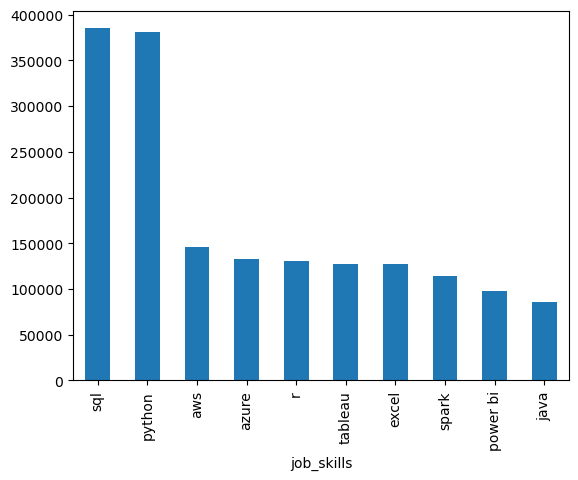

In [10]:
df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")

In [12]:
skills_count = df_exploded.groupby(["job_title_short", "job_skills"]).size()

In [17]:
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count = df_skills_count.sort_values(by="skill_count", ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1537,Senior Data Analyst,sqlserver,1
1542,Senior Data Analyst,symfony,1
278,Cloud Engineer,f#,1
1769,Senior Data Engineer,symfony,1


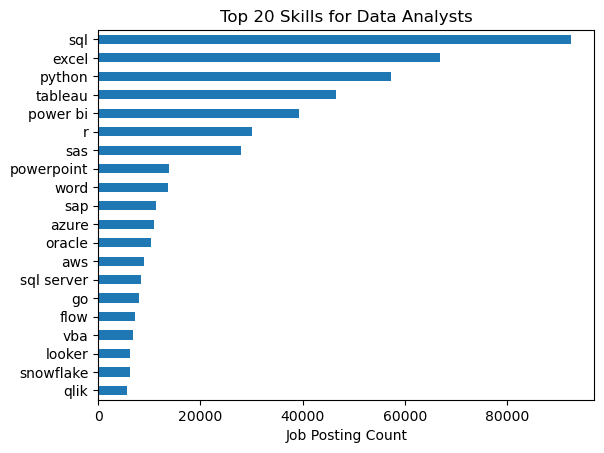

In [27]:
job_title = "Data Analyst"
top_skills = 20
df_skill_final = df_skills_count[df_skills_count["job_title_short"] == job_title].head(top_skills)
df_skill_final.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} Skills for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()